# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.stats import norm 
from scipy.stats import multivariate_normal
import time
import sys

flt_min = sys.float_info.min

%matplotlib inline

In [2]:
# This is added to ignore DeprecationWarning: np.asscalar(a)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our ground truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [3]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3
mixGaussTrue['d'] = 2
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [4]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [5]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [6]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [7]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    
    return     


**TODO H HERE:**

Complete the TO DO in this function before moving on.

In [8]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])                                                               
        # draw a sample from the appropriate Gaussian distribution  
        # first sample from the covariance matrix (google how to do this - it
        # will involve the numpy function np.linalg.cholesky().  Then add the mean vector
        # TO DO (h)- insert data generation code here
        ''' 
        The googled page I learned to use cholesky:
        https://towardsdatascience.com/the-significance-and-applications-of-covariance-matrix-d021c17bce82
        '''

        L = np.linalg.cholesky(mixGauss['cov'][:,:,h])

        mean = mixGauss['mean'][:,h]

        data[:,cData] = mean + L.dot(np.random.randn(len(data)))
                                                                                                         
    return data

With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

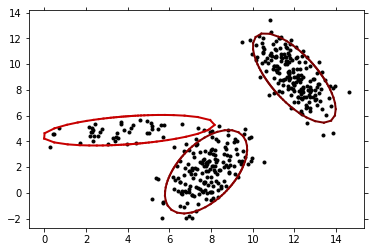

In [9]:
#define number of samples to generate
nData = 400;

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

### Comments on 4th results
We generated 3 data groups according to 3 different distributions. Our goal is to use EM algorithm to seperate the 3 data groups (Idealy drawing the exact 3 ovals showing in the figure).

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO I HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [10]:
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    
    data = np.atleast_2d(data)                                                                         
    # find total number of data items                                                                  
    nDims, nData = data.shape                                                                          
    
    # initialize log likelihoods                                                                       
    logLike = 0;                                                                                       
                                                                                                       
    # run through each data item                                                                       
    for cData in range(nData):
        thisData = data[:, cData]                                                                      
        # TO DO (i)- calculate likelihood of this data point under mixture of                         
        # Gaussians model. Replace this
        ''' 
        This is similar to practicalMixGaussA TO DO B
        some code in this part is directly from practicalMixGaussA
        first calculate the likelihood of each data according to the Gaussian
        then calculate the likelihood of whole data set by summing all the weighted probability
        '''
        like = 0
        for i in range(mixGaussEst['k']):
            # Previous notebooks calcGaussianProb part start
            const = 1/((2*np.pi)**(nDims/2) * np.sqrt(np.linalg.det(mixGaussEst['cov'][:,:,i])))
            data_gaussmean = thisData-mixGaussEst['mean'][:,i]
            exp_part = np.exp(-0.5 * (data_gaussmean).T @ np.linalg.inv(mixGaussEst['cov'][:,:,i]) @ (data_gaussmean))
            like_data = const * exp_part
            # Previous notebooks calcGaussianProb part end

            like += mixGaussEst['weight'][i] * like_data


        # add to total log like                                                                        
        logLike = logLike + np.log(like)                                                               
                                                                                                       
    return  np.asscalar(logLike)                                                                       
                                                                                                       

**TODO J HERE:** 

Fill out the missing parts below. 

In [11]:
def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incremently plots the outcome.
               
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    
    nDims, nData = data.shape


    postHidden = np.zeros(shape=(k, nData))

    # we will initialize the values to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)
        

    # calculate current likelihood
    # TO DO (j) starts here - fill in this routine
    ''' 
    This part is almost identical to practicalMixGaussB
    The code is taken directly from that notebook and added some new lines 
    because we do not have the full functions from practicalMixGaussB
    '''
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))

    nIter = 30;

    logLikeVec = np.zeros(shape=(2 * nIter))
    boundVec = np.zeros(shape=(2 * nIter))

    fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):

        # ===================== =====================
        # Expectation step
        # ===================== =====================

        for cData in range(nData):
            # TO DO : fill in column of 'hidden' - calculate posterior probability that
            # this data point came from each of the Gaussians
            # replace this:
            ''' 
            Modified from practicalMixGaussB 
            Added in the calcGaussianProb function
            '''
            curdata = data[:, cData]
            E_numerator = np.zeros((mixGaussEst['k'],1))
            # Calculate for all data points
            for i in range(mixGaussEst['k']):
                # Previous notebooks calcGaussianProb part start
                const = 1/((2*np.pi)**(nDims/2) * np.sqrt(np.linalg.det(mixGaussEst['cov'][:,:,i])))
                data_gaussmean = curdata-mixGaussEst['mean'][:,i]
                exp_part = np.exp(-0.5 * (data_gaussmean).T @ np.linalg.inv(mixGaussEst['cov'][:,:,i]) @ (data_gaussmean))
                like_data = const * exp_part
                # Previous notebooks calcGaussianProb part end
                
                E_numerator[i] = mixGaussEst['weight'][i] * like_data

            postHidden[:, cData] = (E_numerator/np.sum(E_numerator)).reshape(len(E_numerator),)
            

        # ===================== =====================
        # Maximization Step
        # ===================== =====================
        # for each constituent Gaussian
        ''' 
        Modified from practicalMixGaussB 
        Modified some matrices since we are now dealing with multi-dimensional data
        '''
        for cGauss in range(k):
            # TO DO :  Update weighting parameters mixGauss.weight based on the total
            # posterior probability associated with each Gaussian. Replace this:
            '''No change needed'''
            lambda_numerator = np.sum(postHidden[cGauss, :])
            lambda_denominator = np.sum(postHidden)
            mixGaussEst['weight'][cGauss] = lambda_numerator/lambda_denominator
            
            
            # TO DO :  Update mean parameters mixGauss.mean by weighted average
            # where weights are given by posterior probability associated with
            # Gaussian.  Replace this:
            '''Need to consider all dimentions, no longer use np.sum'''
            mu_numerator = postHidden[cGauss, :].reshape(1,len(postHidden[cGauss, :])) @ data.T
            mu_denominator = lambda_numerator
            mixGaussEst['mean'][:,cGauss] = mu_numerator/mu_denominator
            
            
            # TO DO :  Update covarance parameter based on weighted average of
            # square distance from update mean, where weights are given by
            # posterior probability associated with Gaussian
            ''' 
            we did (data - mean) last time, but now we need to consider diff dimensions 
            previously (data - mean) was 1 dimensional so we used * directly
            but now we have to use @ for matrices multiplication 
            '''
            sigma_numerator = 0
            for i in range(nData):
                # diff has to be reshape for calculating sigma_numerator
                diff = data[:, i].reshape(2,1) - mixGaussEst['mean'][:,cGauss].reshape(2,1)
                sigma_numerator += postHidden[cGauss, i] * diff @ diff.T

            sigma_denominator = lambda_numerator

            mixGaussEst['cov'][:,:,cGauss] = sigma_numerator/sigma_denominator
            

            # draw the new solution
        drawEMData2d(data, mixGaussEst)
        # time.sleep(0.7)
        ''' This is modified so we can see the figure every 5 iterations '''
        if globalflag != 1 and cIter%5 == 0:
            plt.pause(0.1)
        fig.canvas.draw()


        # calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        if globalflag != 1:
            print('Log Likelihood After Iter {} : {:4.3f}\n'.format(cIter, logLike))


    return mixGaussEst

### Time to put it all together!

Make sure you've filled all the TO DOs above! 

Log Likelihood Iter 0 : -5161.257



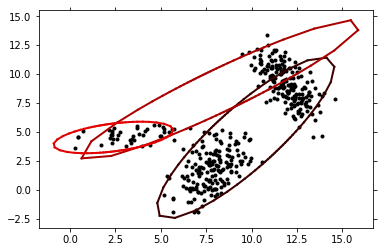

Log Likelihood After Iter 0 : -1891.476

Log Likelihood After Iter 1 : -1879.173

Log Likelihood After Iter 2 : -1866.638

Log Likelihood After Iter 3 : -1855.661

Log Likelihood After Iter 4 : -1840.643



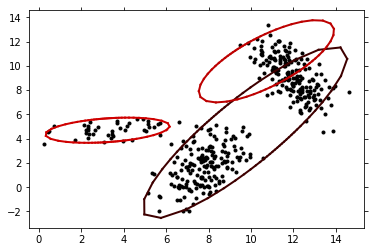

Log Likelihood After Iter 5 : -1809.976

Log Likelihood After Iter 6 : -1745.136

Log Likelihood After Iter 7 : -1726.364

Log Likelihood After Iter 8 : -1711.217

Log Likelihood After Iter 9 : -1695.462



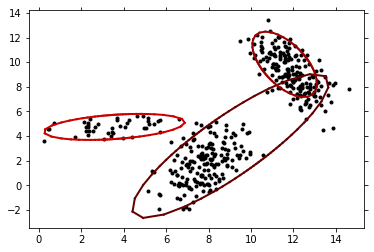

Log Likelihood After Iter 10 : -1678.325

Log Likelihood After Iter 11 : -1659.635

Log Likelihood After Iter 12 : -1637.689

Log Likelihood After Iter 13 : -1607.576

Log Likelihood After Iter 14 : -1587.927



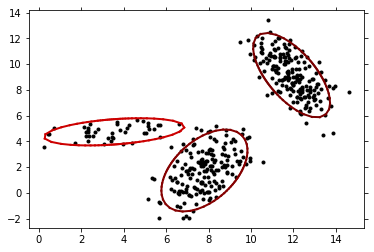

Log Likelihood After Iter 15 : -1587.148

Log Likelihood After Iter 16 : -1587.143

Log Likelihood After Iter 17 : -1587.142

Log Likelihood After Iter 18 : -1587.142

Log Likelihood After Iter 19 : -1587.142



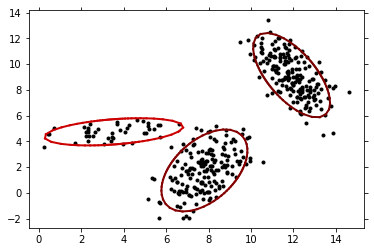

Log Likelihood After Iter 20 : -1587.142

Log Likelihood After Iter 21 : -1587.142

Log Likelihood After Iter 22 : -1587.142

Log Likelihood After Iter 23 : -1587.142

Log Likelihood After Iter 24 : -1587.142



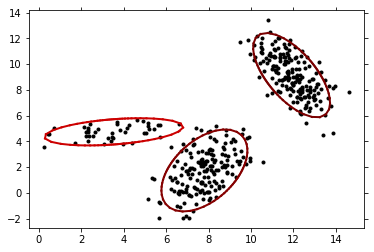

Log Likelihood After Iter 25 : -1587.142

Log Likelihood After Iter 26 : -1587.142

Log Likelihood After Iter 27 : -1587.142

Log Likelihood After Iter 28 : -1587.142

Log Likelihood After Iter 29 : -1587.142



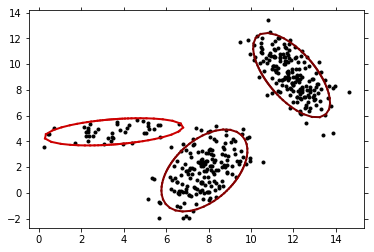

In [12]:
# This flag decide to print the Log Likelihood or not, will be needed later
globalflag = 0

#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
#TO DO fill in this routine (below)
mixGaussEst = fitMixGauss(data,nGaussEst);

### Comments on 5th results
1. Results: From figures above we can see how the EM algorithm works. Over each iteration, the likelihood increases and the grouping starts to cluster to the correct distribution. 
2. Possibility of failure: This method might fail as sometimes one or more models start by choosing too few points so the remaining model will have to fit to all other data (see below). Below runs the code 10 times and usually 2~3 failure will appear. 

Test:  1
Log Likelihood Iter 0 : -5608.316



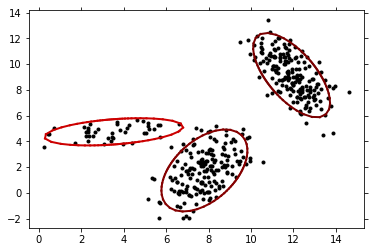

Test:  2
Log Likelihood Iter 0 : -7682.657



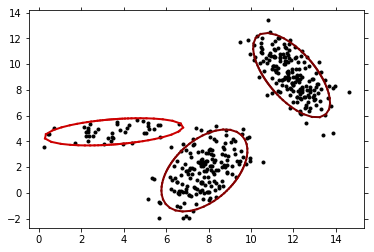

Test:  3
Log Likelihood Iter 0 : -5605.663



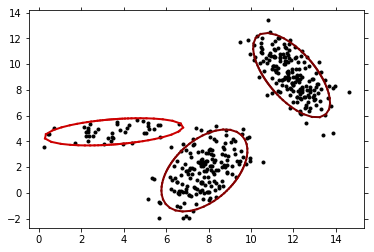

Test:  4
Log Likelihood Iter 0 : -9215.174



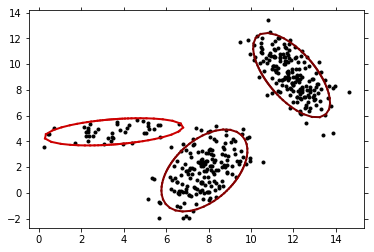

Test:  5
Log Likelihood Iter 0 : -14481.820



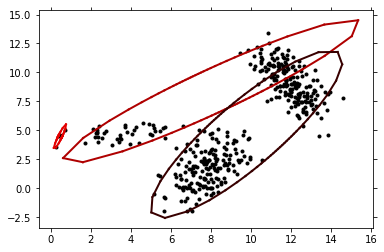

Test:  6
Log Likelihood Iter 0 : -24155.998



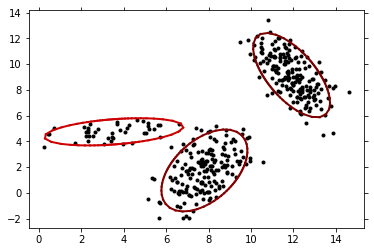

Test:  7
Log Likelihood Iter 0 : -8528.466



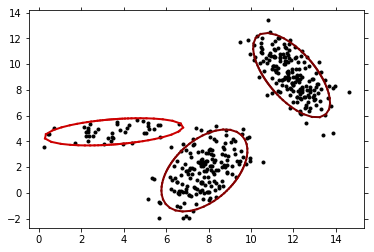

Test:  8
Log Likelihood Iter 0 : -7646.658



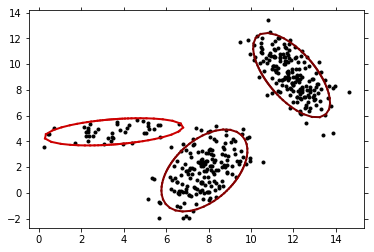

Test:  9
Log Likelihood Iter 0 : -9457.744



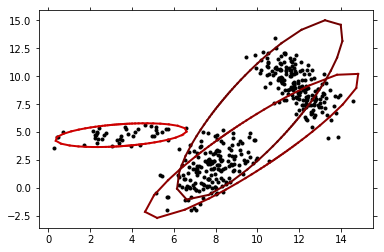

Test:  10
Log Likelihood Iter 0 : -5546.632



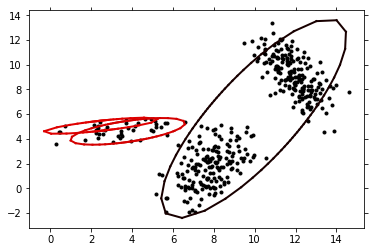

In [17]:
# This part runs 10 times to check how well our code perform, globalflag stops Log Likelihood from printing
globalflag = 1

for run in range(10):
    print("Test: ", run+1)
    #define number of components to estimate
    nGaussEst = 3

    #fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
    #TO DO fill in this routine (below)
    mixGaussEst = fitMixGauss(data,nGaussEst);
    plt.pause(0.3)

globalflag = 0